In [887]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression

iris = load_iris()

In [949]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [923]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [907]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [911]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [917]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [919]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


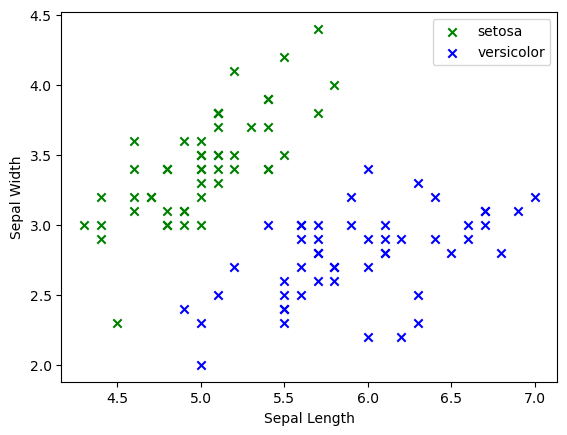

In [937]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

df0 = df[:50]
df1 = df[50:100]

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], marker='x', color='green', label='setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], marker='x', color='blue', label='versicolor')
plt.legend()
plt.show()

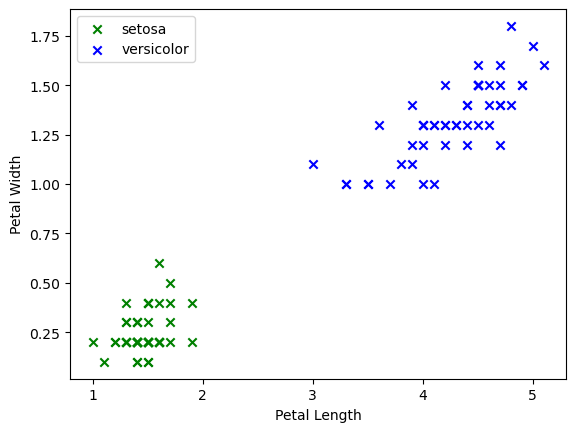

In [941]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', label='setosa', marker='x')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', label='versicolor', marker='x')
plt.legend()
plt.show()

In [1081]:
model = LogisticRegression()

X = df.drop(columns=['target','flower_name'])
y = df.flower_name
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=10)

model.fit(X_train, y_train)
print(f'Score: {model.score(X_test, y_test)}')

predictions = model.predict([[7.2 , 1.2, 4.8, 1.5]])
print(f'Its iris-{predictions[0]}')

Score: 1.0
Its iris-versicolor
